# Crop Yield Prediction

## 1.Import Libraries

In [5]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


## 2. Load Dataset

In [7]:
# load the dataset
df = pd.read_csv('faisalabad_crop_yield_2013_2022.csv')

## 3. EDA

In [8]:
# To check the first 5 rows of the dataset
print(df.head())

   Year    District     Crop Soil_Type  Rainfall_mm  Temperature_C  \
0  2013  Faisalabad    Wheat      Clay          452             30   
1  2013  Faisalabad     Rice     Sandy          388             32   
2  2013  Faisalabad  Soybean      Loam          475             25   
3  2014  Faisalabad    Wheat      Loam          350             21   
4  2014  Faisalabad     Rice      Clay          329             22   

   Fertilizer_kg_per_acre  Irrigation_mm Pesticide_Used  Yield_kg_per_acre  
0                      62            106            Yes               3036  
1                     109            169             No               3380  
2                      87            205             No               1846  
3                      89            170            Yes               3031  
4                      91            226             No               3012  


In [9]:
# to check the last 5 rows of the dataset
print(df.tail())

    Year    District     Crop Soil_Type  Rainfall_mm  Temperature_C  \
25  2021  Faisalabad     Rice      Clay          256             28   
26  2021  Faisalabad  Soybean      Loam          350             23   
27  2022  Faisalabad    Wheat      Loam          444             21   
28  2022  Faisalabad     Rice      Clay          373             27   
29  2022  Faisalabad  Soybean      Loam          311             30   

    Fertilizer_kg_per_acre  Irrigation_mm Pesticide_Used  Yield_kg_per_acre  
25                      96            250             No               3228  
26                      66            230             No               1712  
27                      79            248            Yes               2655  
28                     103            109             No               3237  
29                      63            108            Yes               1923  


In [10]:
# to check the shape of the dataset
print(df.shape)

(30, 10)


In [17]:
# To check the data types of the columns
print(f"Data types:\n{df.dtypes}")
# To check the summary statistics of the datase
(df.describe())
print(f"Data Info:\n{df.describe()}")


Data types:
Year                       int64
District                  object
Crop                      object
Soil_Type                 object
Rainfall_mm                int64
Temperature_C              int64
Fertilizer_kg_per_acre     int64
Irrigation_mm              int64
Pesticide_Used            object
Yield_kg_per_acre          int64
dtype: object
Data Info:
              Year  Rainfall_mm  Temperature_C  Fertilizer_kg_per_acre  \
count    30.000000    30.000000      30.000000               30.000000   
mean   2017.500000   364.666667      26.266667               82.766667   
std       2.921384    68.972425       3.473380               14.435787   
min    2013.000000   253.000000      21.000000               61.000000   
25%    2015.000000   312.500000      24.000000               72.250000   
50%    2017.500000   358.000000      26.000000               82.500000   
75%    2020.000000   429.750000      29.000000               92.500000   
max    2022.000000   475.000000      32.0

In [19]:
# To check the null or missing values in the dataset
print(df.isnull().sum())


Year                      0
District                  0
Crop                      0
Soil_Type                 0
Rainfall_mm               0
Temperature_C             0
Fertilizer_kg_per_acre    0
Irrigation_mm             0
Pesticide_Used            0
Yield_kg_per_acre         0
dtype: int64


## Crop-wise Yield Distribution

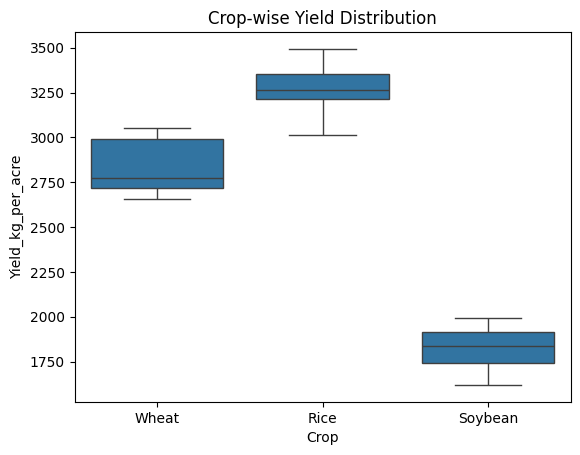

In [20]:
sns.boxplot(x='Crop', y='Yield_kg_per_acre', data=df)
plt.title("Crop-wise Yield Distribution")
plt.show()


## Rainfall vs Yield

In [ ]:
sns.scatterplot(x='Rainfall_mm', y='Yield_kg_per_acre', hue='Crop', data=df)
plt.title("Rainfall vs Yield")
plt.show()


## Temperature vs Yield

In [ ]:
sns.barplot(x='Temperature_C', y='Yield_kg_per_acre', hue='Crop', data=df)
plt.title("Temperature vs Yield")
plt.show()


## Correlation

In [ ]:
df_corr = df.copy()
df_corr["Crop"] = df_corr["Crop"].astype("category").cat.codes
df_corr["Soil_Type"] = df_corr["Soil_Type"].astype("category").cat.codes
df_corr["Pesticide_Used"] = df_corr["Pesticide_Used"].map({"Yes": 1, "No": 0})

sns.heatmap(df_corr.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## Pairplot

In [ ]:
sns.pairplot(df, hue='Crop')
plt.show()


## Data Preprocessing

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


### Encode Categorical Variables

In [29]:
df_encoded = df.copy()

# Encode Crop, Soil_Type, and Pesticide_Used
label_encoders = {}
for col in ["Crop", "Soil_Type", "Pesticide_Used"]:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Save encoder for inverse transform later


### Split Features and Target

In [30]:
X = df_encoded.drop(columns=["Yield_kg_per_acre", "District"])
y = df_encoded["Yield_kg_per_acre"]


### Train-Test Split



In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 4. Train a Random Forest Model
### Import Required Library

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Train the Model

In [34]:
# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

### Make Predictions

In [35]:
# Predict
y_pred = rf_model.predict(X_test)

### Evaluate the Model



In [38]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error: 151.72
Mean Squared Error: 32336.01
R^2 Score: 0.86


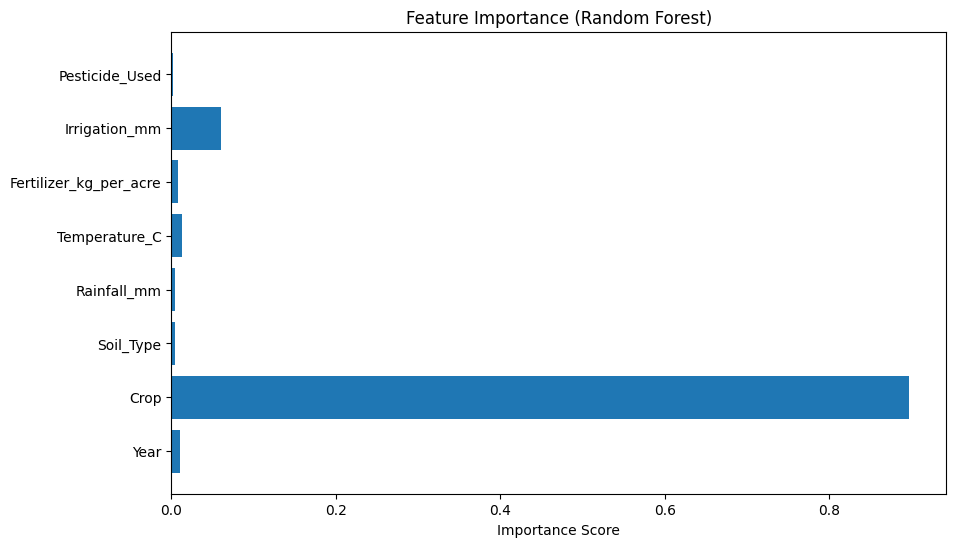

In [39]:
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel("Importance Score")
plt.title("Feature Importance (Random Forest)")
plt.show()